# Time Series exploration of Newcastle's [Urban Observatory](http://uoweb1.ncl.ac.uk) sensors

Author: Adelson Araujo Jr (adelsondias@live.com)

* to visualize the maps inside of this notebook, open it by [NBViewer](http://nbviewer.jupyter.org/github/adaj/air-quality/blob/master/eda/spatial_exploration.ipynb)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

import sys
sys.path.insert(0,'../src')
from v0 import *

In [2]:
# utils
def seasonal_analysis(ts, freq_sample='H', seasonal_freq=24, plot=True, figsize=(12,8)):
    ts = ts.resample('H').mean()
    sd = seasonal_decompose(ts, freq=seasonal_freq, two_sided=False)
    if plot:
        fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=figsize);
        sd.observed.plot(ax=axes[0],color='black')
        axes[0].legend(['Observed'],loc=3)
        sd.trend.plot(ax=axes[1],color='r')
        axes[1].legend(['Trend'],loc=3)
        sd.seasonal.plot(ax=axes[2],color='g')
        axes[2].legend(['Seasonal'],loc=3)
        sd.resid.plot(ax=axes[3])
        axes[3].legend(['Residuals'],loc=3)
        plt.suptitle('Seasonal & Trend Decomposition', fontsize=18)
        plt.show()
    return sd

## Dataset

Datasets extracted from http://uoweb1.ncl.ac.uk/download/

In [174]:
SHAPE_FOLDER = '/home/adelsondias/Repos/newcastle/air-quality/shape/Middle_Layer_Super_Output_Areas_December_2011_Full_Extent_Boundaries_in_England_and_Wales/'
DATA_FOLDER = '/home/adelsondias/Repos/newcastle/air-quality/data_allsensors_8days/'
metadata, sfeat, sensors = load_data(SHAPE_FOLDER, DATA_FOLDER)

In [5]:
sensors.head()

,Sensor Name,Variable,Units,Timestamp,Value
Timestamp,,,,,
2018-07-05 23:04:00,CAJT_NCA186_WR1_WR2,Journey Time,seconds,2018-07-05 23:04:00,98.0
2018-07-05 23:08:00,CAJT_NCA186_WR1_WR2,Journey Time,seconds,2018-07-05 23:08:00,98.0
2018-07-05 23:12:00,CAJT_NCA186_WR1_WR2,Journey Time,seconds,2018-07-05 23:12:00,180.0
2018-07-05 23:20:00,CAJT_NCA186_WR1_WR2,Journey Time,seconds,2018-07-05 23:20:00,133.0
2018-07-05 23:24:00,CAJT_NCA186_WR1_WR2,Journey Time,seconds,2018-07-05 23:24:00,98.0


## Description

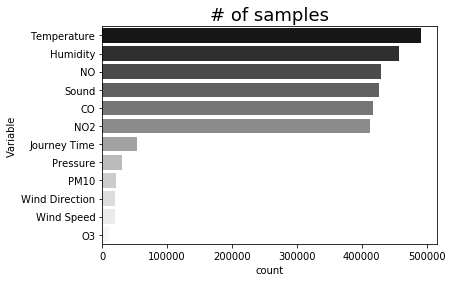

In [6]:
# sensors['Variable'].value_counts()
a= sns.countplot(y="Variable", data=sensors, order=sensors['Variable'].value_counts().index, palette='Greys_r')
a.set_title('# of samples', fontsize=18);

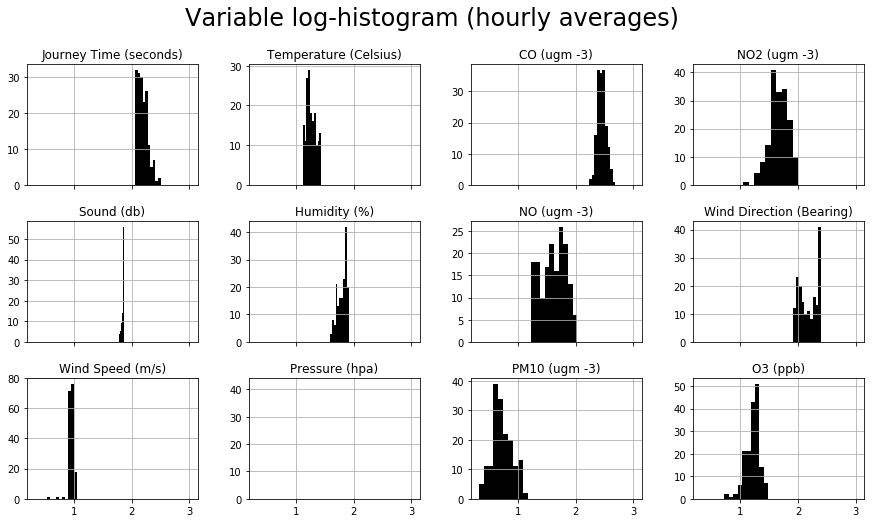

In [7]:
# plot timeseries of variables
variables = sensors['Variable'].unique()

cols=4
rows=int(len(variables)/4)

fig, axes = plt.subplots(ncols=cols, nrows=rows, sharex=True, figsize=(15,8));
v = 0
for i in range(0,rows):
    for j in range(0,cols):
        sensors[sensors['Variable']==variables[v]].resample('H').mean().apply(lambda x: np.log10(x)).hist(ax=axes[i][j],color='black');
        axes[i][j].set_title('{} ({})'.format(variables[v],sensors['Units'].loc[sensors['Variable']==variables[v]].iloc[0]))
        v+=1
        
fig.suptitle('Variable log-histogram (hourly averages)', fontsize=24)
plt.show()

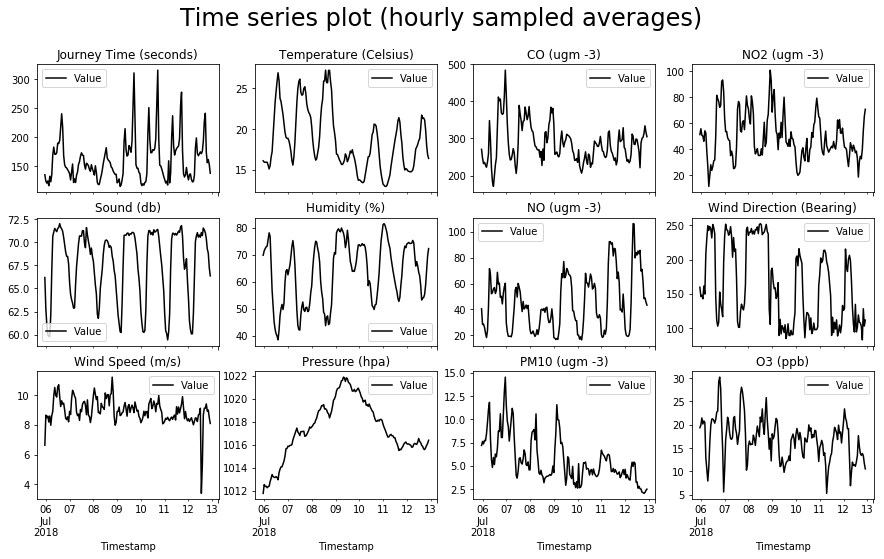

In [8]:
# plot timeseries of variables
variables = sensors['Variable'].unique()

cols=4
rows=int(len(variables)/4)

fig, axes = plt.subplots(ncols=cols, nrows=rows, sharex=True, figsize=(15,8));
v = 0
for i in range(0,rows):
    for j in range(0,cols):
        sensors[sensors['Variable']==variables[v]].resample('H').mean().plot(color='black',
            title='{} ({})'.format(variables[v], sensors['Units'].loc[sensors['Variable']==variables[v]].iloc[0]),
            ax=axes[i][j]);
        v+=1
        
fig.suptitle('Time series plot (hourly sampled averages)', fontsize=24)
plt.show()

## Seasonal analysis

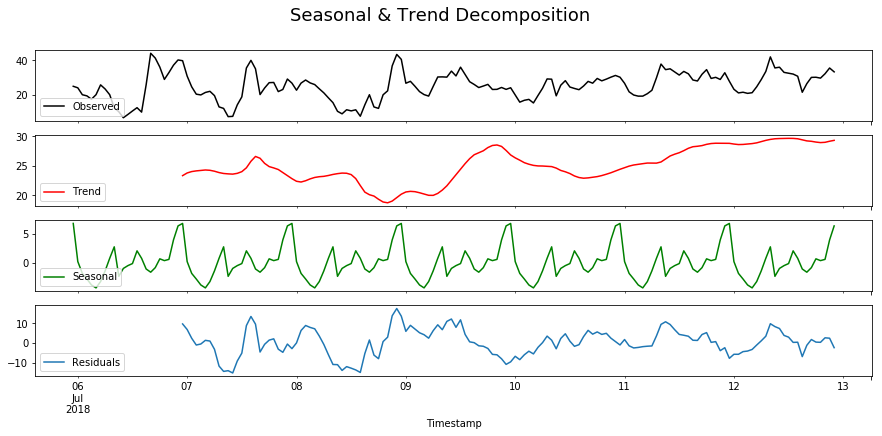

In [9]:
# NO2 (one sensor)
var = 'NO2'
sname = 'amey_emote_1507'

ts = sensors[sensors['Variable']==var]
ts = ts[ts['Sensor Name']==sname]
seasonal_analysis(ts, freq_sample='H', seasonal_freq=24, plot=True, figsize=(15,6));

## Seasonal features

In [188]:
variables =  {
        'sensors':['NO2','Temperature','Humidity','O3','CO','PM10'],
        'exogenous':['primary','trunk','motorway','signals','day','dow','hour'] #'street' = 'primary','trunk','motorway','traffic_signals'
}
freq = 'H'
sensors, metadata = resampling_sensors(sensors, metadata, variables, freq)
sensors.head()

Value
Variable Sensor Name        Timestamp                      
CO       new_new_emote_1171 2018-07-09 00:00:00  339.778600
                            2018-07-09 01:00:00  283.405224
                            2018-07-09 02:00:00  277.713101
                            2018-07-09 03:00:00  293.153282
                            2018-07-09 04:00:00  287.135815

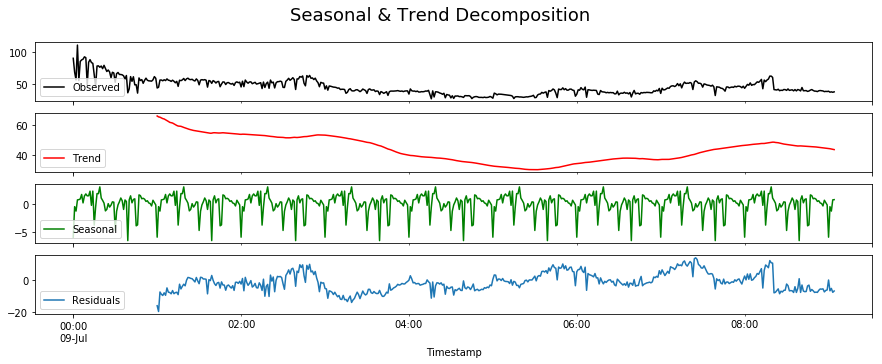

In [58]:
ts = sensors.loc['NO2'].reset_index().groupby('Timestamp').mean()
sd = seasonal_decompose(ts, freq=60, two_sided=False)

fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(15,5));
sd.observed.plot(ax=axes[0],color='black')
axes[0].legend(['Observed'],loc=3)
sd.trend.plot(ax=axes[1],color='r')
axes[1].legend(['Trend'],loc=3)
sd.seasonal.plot(ax=axes[2],color='g')
axes[2].legend(['Seasonal'],loc=3)
sd.resid.plot(ax=axes[3])
axes[3].legend(['Residuals'],loc=3)
plt.suptitle('Seasonal & Trend Decomposition', fontsize=18)
plt.show()

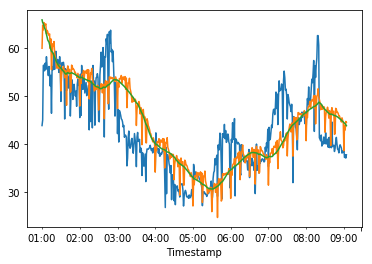

In [82]:

sd.observed.loc[ix,'Value'].plot()
(trend+seaso).plot()
trend.plot()
plt.show()

# seaso

In [204]:
idx = pd.IndexSlice

if freq=='D':
    f = 7 # when having enough data
elif freq=='H' or freq=='Min':
    f = 24
    
try:    
    ts = sensors.loc['NO2'].reset_index().groupby('Timestamp').mean()
    ix = seasonal_decompose(ts, freq=f, two_sided=False).trend.dropna().index
    stdec = pd.DataFrame(index=pd.MultiIndex.from_product([sensors.index.get_level_values(0).unique(),ix], 
                                                      names=['Variable','Timestamp']),
                            columns=['seaso','trend'])
    for var in sensors.index.get_level_values(0).unique():
        ts = sensors.loc[var].reset_index().groupby('Timestamp').mean()
        sd = seasonal_decompose(ts, freq=f, two_sided=False)
        stdec.loc[idx[var,:],'trend'] = sd.trend.loc[ix,'Value'].values
        stdec.loc[idx[var,:],'seaso'] = sd.seasonal.loc[ix,'Value'].values
except:
    print('Invalid frequency on seasonal decomposition and only trend ')
    f = 4
    ts = sensors.loc['NO2'].reset_index().groupby('Timestamp').mean()
    ix = seasonal_decompose(ts, freq=f, two_sided=False).trend.dropna().index
    stdec = pd.DataFrame(index=pd.MultiIndex.from_product([sensors.index.get_level_values(0).unique(),ix], 
                                                      names=['Variable','Timestamp']),
                            columns=['trend'])
    for var in sensors.index.get_level_values(0).unique():
        ts = sensors.loc[var].reset_index().groupby('Timestamp').mean()
        sd = seasonal_decompose(ts, freq=f, two_sided=False)
        stdec.loc[idx[var,:],'trend'] = sd.trend.loc[ix,'Value'].values
stdec



Invalid frequency on seasonal decomposition. Using default freq=4


trend
Variable    Timestamp                   
CO          2018-07-09 04:00:00  255.834
            2018-07-09 05:00:00  250.479
            2018-07-09 06:00:00   251.64
            2018-07-09 07:00:00  258.035
            2018-07-09 08:00:00  271.375
            2018-07-09 09:00:00   287.48
Humidity    2018-07-09 04:00:00    76.62
            2018-07-09 05:00:00  77.5182
            2018-07-09 06:00:00   77.734
            2018-07-09 07:00:00  77.7903
            2018-07-09 08:00:00  77.6455
            2018-07-09 09:00:00   77.408
NO2         2018-07-09 04:00:00  42.4232
            2018-07-09 05:00:00  37.1752
            2018-07-09 06:00:00  33.4987
            2018-07-09 07:00:00   32.662
            2018-07-09 08:00:00  35.6001
            2018-07-09 09:00:00  38.8546
O3          2018-07-09 04:00:00  20.6644
            2018-07-09 05:00:00  21.5213
            2018-07-09 06:00:00  22.0885
            2018-07-09 07:00:00  21.3365
            2018-07-09 08:00:00  19.2424
            2018-07-09 09:00:00  16.7372
PM10        2018-07-09 04:00:00  10.2802
            2018-07-09 05:00:00  11.3591
            2018-07-09 06:00:00   11.759
            2018-07-09 07:00:00  11.3517
            2018-07-09 08:00:00  10.7269
            2018-07-09 09:00:00  10.3079
Temperature 2018-07-09 04:00:00  17.0836
            2018-07-09 05:00:00   16.611
            2018-07-09 06:00:00  16.3051
            2018-07-09 07:00:00  16.0308
            2018-07-09 08:00:00  15.8681
            2018-07-09 09:00:00  15.8176

In [200]:
ts = sensors.loc['NO2'].reset_index().groupby('Timestamp').mean()
seasonal_decompose(ts, freq=4, two_sided=False)